In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter

from PIL import Image 
from wordcloud import WordCloud  
import matplotlib.colors as colors
import xlwt
import docx
from wordcloud import STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_data.csv') 
df.head()

,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma
0,923,0,3,2014-12-08,the food at snack is a selection of popular gr...,-1,the food at snack is a selection of popular gr...,food snack selection popular greek dishes appe...,food snack selection popular greek dish appeti...
1,924,0,3,2013-05-16,this little place in soho is wonderful. i had ...,-1,this little place in soho is wonderful i had ...,little place soho wonderful lamb sandwich glas...,little place soho wonderful lamb sandwich glas...
2,925,0,4,2013-07-01,ordered lunch for 15 from snack last friday. ã...,-1,ordered lunch for NUMBER from snack last fri...,ordered lunch NUMBER snack last friday ãâ tim...,order lunch NUMBER snack last friday ãâ time ...
3,926,0,4,2011-07-28,this is a beautiful quaint little restaurant o...,-1,this is a beautiful quaint little restaurant o...,beautiful quaint little restaurant pretty stre...,beautiful quaint little restaurant pretty stre...
4,927,0,4,2010-11-01,snack is great place for a ãâ casual sit down...,-1,snack is great place for a ãâ casual sit down...,snack great place ãâ casual sit lunch especia...,snack great place ãâ casual sit lunch especia...


In [3]:
df['Review_Lemma'] = df['Review_Lemma'].str.replace('NUMBER','').str.replace('CUR','')
df['Review_Lemma'] = df['Review_Lemma'].str.replace('love love love','love').str.replace('love love','love')
df['Review_Lemma'] = df['Review_Lemma'].str.replace('new york city','NYC').str.replace('new york','NYC')
df['Review_Lemma'] = df['Review_Lemma'].str.replace('good','').str.replace('great','')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359052 entries, 0 to 359051
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User_id              359052 non-null  int64 
 1   Product_id           359052 non-null  int64 
 2   Rating               359052 non-null  int64 
 3   Date                 359052 non-null  object
 4   Review               359052 non-null  object
 5   Label                359052 non-null  int64 
 6   Review_cleaned       359052 non-null  object
 7   Review_no_stopwords  359001 non-null  object
 8   Review_Lemma         359001 non-null  object
dtypes: int64(4), object(5)
memory usage: 24.7+ MB


In [5]:
# df[df['Review_Lemma'].isna()]

In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359001 entries, 0 to 359051
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User_id              359001 non-null  int64 
 1   Product_id           359001 non-null  int64 
 2   Rating               359001 non-null  int64 
 3   Date                 359001 non-null  object
 4   Review               359001 non-null  object
 5   Label                359001 non-null  int64 
 6   Review_cleaned       359001 non-null  object
 7   Review_no_stopwords  359001 non-null  object
 8   Review_Lemma         359001 non-null  object
dtypes: int64(4), object(5)
memory usage: 27.4+ MB


In [7]:
df['Product_id'].nunique()

923

In [8]:
df.Label.value_counts()

 1    322123
-1     36878
Name: Label, dtype: int64

In [9]:
df.Rating.value_counts()

5    141141
4    135236
3     47635
2     20771
1     14218
Name: Rating, dtype: int64

* **Rated 1,2,3: negative reviews**
* **Rated 4,5: positive reviews**

In [10]:
genuine=df[df['Label']==1].reset_index().drop(columns='index')
genuine.head()

,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma
0,937,0,4,2014-10-15,"tiny little place, but very good food. pastits...",1,tiny little place but very good food pastits...,tiny little place good food pastitsio especial...,tiny little place food pastitsio especially
1,938,0,5,2014-10-10,i had the braised lamb sandwich and was one of...,1,i had the braised lamb sandwich and was one of...,braised lamb sandwich one best sandwiches life...,braise lamb sandwich one best sandwich life fa...
2,939,0,3,2014-10-03,this spot is close to my job so i decided to c...,1,this spot is close to my job so i decided to c...,spot close job decided check lunch prices woul...,spot close job decide check lunch price would ...
3,940,0,4,2014-09-16,"for lunch, my friend and i had: -lamb sandwich...",1,for lunch my friend and i had lamb sandwich...,lunch friend lamb sandwich juicy flavorful roa...,lunch friend lamb sandwich juicy flavorful roa...
4,941,0,5,2014-08-10,"needed a quick, healthy light ""lunch"" and this...",1,needed a quick healthy light lunch and this...,needed quick healthy light lunch place perfect...,need quick healthy light lunch place perfect n...


In [11]:
genuine['Tag']=np.where(genuine['Rating']>3, 1, 0)
genuine.head()

,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma,Tag
0,937,0,4,2014-10-15,"tiny little place, but very good food. pastits...",1,tiny little place but very good food pastits...,tiny little place good food pastitsio especial...,tiny little place food pastitsio especially,1
1,938,0,5,2014-10-10,i had the braised lamb sandwich and was one of...,1,i had the braised lamb sandwich and was one of...,braised lamb sandwich one best sandwiches life...,braise lamb sandwich one best sandwich life fa...,1
2,939,0,3,2014-10-03,this spot is close to my job so i decided to c...,1,this spot is close to my job so i decided to c...,spot close job decided check lunch prices woul...,spot close job decide check lunch price would ...,0
3,940,0,4,2014-09-16,"for lunch, my friend and i had: -lamb sandwich...",1,for lunch my friend and i had lamb sandwich...,lunch friend lamb sandwich juicy flavorful roa...,lunch friend lamb sandwich juicy flavorful roa...,1
4,941,0,5,2014-08-10,"needed a quick, healthy light ""lunch"" and this...",1,needed a quick healthy light lunch and this...,needed quick healthy light lunch place perfect...,need quick healthy light lunch place perfect n...,1


In [12]:
genuine['Tag'].value_counts()

1    248625
0     73498
Name: Tag, dtype: int64

## Word Cloud

In [13]:
def count_words(lines):
    
    words = Counter() # instantiate a Counter object called words
    for line in lines:
        for word in re.findall(r"[\w']{3,}",line):
            words[word] += 1 # increment count for word
    return words

In [14]:
genuine_pos=genuine[genuine['Tag']==1]
genuine_neg=genuine[genuine['Tag']==0]

In [15]:
pos=count_words(genuine_pos['Review_Lemma'])
pos.most_common(5)

[('place', 173587),
 ('food', 160702),
 ('get', 148429),
 ('come', 105249),
 ('like', 103313)]

In [16]:
pos_1=dict()
  
for word,count in pos.most_common(150):
    pos_1.setdefault(word,[]).append(count)

In [17]:
pos_2=pd.DataFrame.from_dict(pos_1).T.rename(columns={0:'count'})
pos_2.to_excel('pos.xlsx')

In [18]:
pos_word = " ".join(pos_2.index)

In [19]:
with open('pos.txt','w') as f:
    f.write(pos_word)
pos_mask=np.array(Image.open('background.png').convert("RGB"))

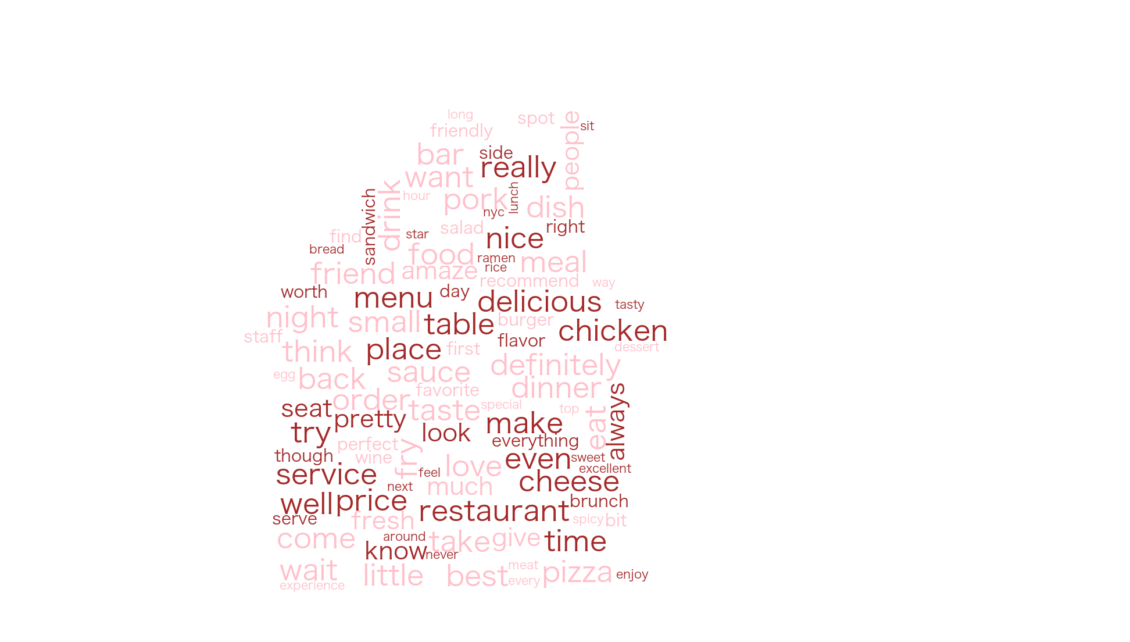

In [20]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['NUMBER','get','thing','say','still','one','two','CUR'])

# Set colors
color_list=['brown','pink']
colormap=colors.ListedColormap(color_list)

# Create and generate a word cloud image:
txt = open("pos.txt", "r", encoding="utf-8").read()
wordcloud = WordCloud(mask=pos_mask,
                      font_path="Hiragino Sans GB.ttc",
                      max_font_size=50, max_words=100,
                      colormap=colormap,
                      stopwords=stopwords,
                      background_color="white").generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(pos_mask)

# Display the generated image:
plt.figure(figsize=[20,30])
# plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.show()

# store to file
plt.savefig("pos_cloud.png", format="png")

In [21]:
neg=count_words(genuine_neg['Review_Lemma'])
neg.most_common(5)

[('food', 63819),
 ('place', 57309),
 ('get', 53438),
 ('like', 44463),
 ('order', 42115)]

In [22]:
neg_1=dict()
  
for word,count in neg.most_common(150):
    neg_1.setdefault(word,[]).append(count)

In [23]:
neg_2=pd.DataFrame.from_dict(neg_1).T.rename(columns={0:'count'})
neg_2.to_excel('neg.xlsx')

In [24]:
neg_word = " ".join(neg_2.index)

In [37]:
with open('neg.txt','w') as f:
    f.write(neg_word)
neg_mask=np.array(Image.open('background.png').convert("RGB"))

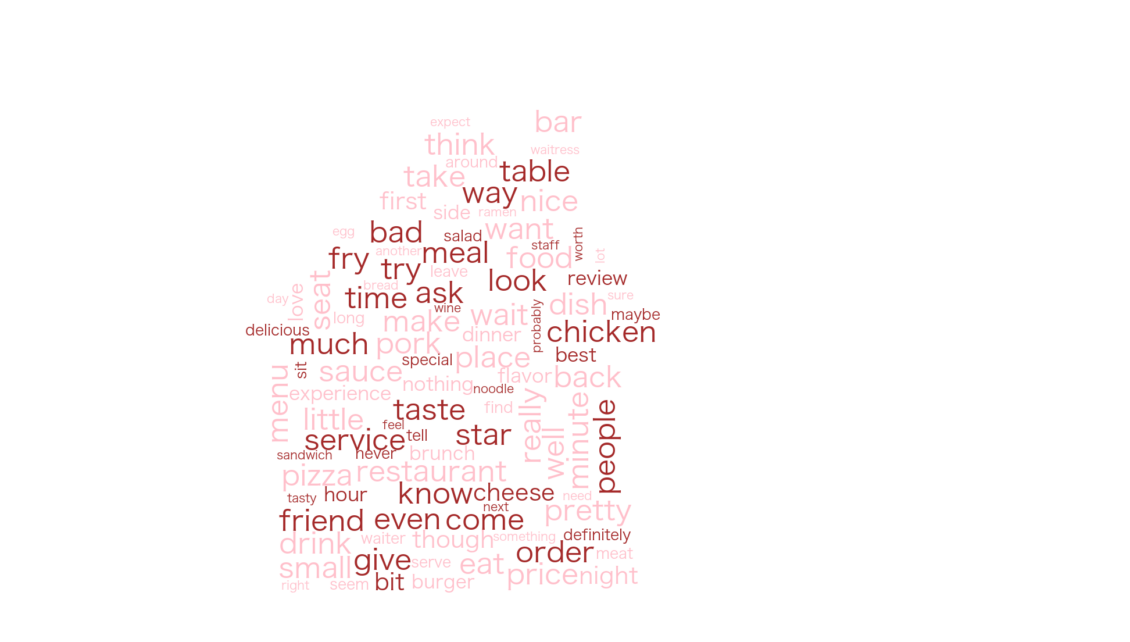

In [38]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['NUMBER','get','thing','say','still','one','two','CUR','see'])

# Set colors
color_list=['brown','pink']
colormap=colors.ListedColormap(color_list)

# Create and generate a word cloud image:
txt = open("neg.txt", "r", encoding="utf-8").read()
wordcloud = WordCloud(mask=neg_mask,
                      font_path="Hiragino Sans GB.ttc",
                      max_font_size=50, max_words=100,
                      colormap=colormap,
                      stopwords=stopwords,
                      background_color="white").generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(pos_mask)

# Display the generated image:
plt.figure(figsize=[20,30])
# plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.show()

# store to file
plt.savefig("neg_cloud.png", format="png")

## Topic Modelling

In [27]:
genuine_pos.head()

,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma,Tag
0,937,0,4,2014-10-15,"tiny little place, but very good food. pastits...",1,tiny little place but very good food pastits...,tiny little place good food pastitsio especial...,tiny little place food pastitsio especially,1
1,938,0,5,2014-10-10,i had the braised lamb sandwich and was one of...,1,i had the braised lamb sandwich and was one of...,braised lamb sandwich one best sandwiches life...,braise lamb sandwich one best sandwich life fa...,1
3,940,0,4,2014-09-16,"for lunch, my friend and i had: -lamb sandwich...",1,for lunch my friend and i had lamb sandwich...,lunch friend lamb sandwich juicy flavorful roa...,lunch friend lamb sandwich juicy flavorful roa...,1
4,941,0,5,2014-08-10,"needed a quick, healthy light ""lunch"" and this...",1,needed a quick healthy light lunch and this...,needed quick healthy light lunch place perfect...,need quick healthy light lunch place perfect n...,1
5,942,0,4,2014-06-17,their artichoke chicken salad is good and plenty.,1,their artichoke chicken salad is good and plenty,artichoke chicken salad good plenty,artichoke chicken salad plenty,1


In [28]:
docs_pos=genuine_pos['Review_Lemma']
docs_neg=genuine_neg['Review_Lemma']

In [29]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

pos_vectorizer = TfidfVectorizer(ngram_range=(3,3), 
                                  binary=True, 
                                  token_pattern=r'\b[a-zA-Z]{3,}\b',
                                  stop_words="english",
                                  min_df=5,
                                  max_df=0.5)

X_pos, pos_terms = pos_vectorizer.fit_transform(docs_pos), pos_vectorizer.get_feature_names()
pos_tf_idf = pd.DataFrame(X_pos.toarray(), columns=pos_terms)
print(f"Positive TF-IDF: {pos_tf_idf.shape}")
pos_tf_idf.head(5)

/Users/wangruyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Positive TF-IDF: (248625, 135924)


,abc carpet home,abc kitchen amaze,abc kitchen best,abc kitchen definitely,abc kitchen disappoint,abc kitchen favorite,abc kitchen food,abc kitchen little,abc kitchen make,abc kitchen new,...,zone try different,zucchini eggplant round,zucchini flower stuff,zucchini hummus pizza,zucchini noodle pad,zucchini pad thai,zucchini toast almond,zuke tuna sashimi,zutto japanese american,zutto pork belly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
neg_vectorizer = TfidfVectorizer(ngram_range=(2,2), 
                                  binary=True, 
                                  token_pattern=r'\b[a-zA-Z]{3,}\b',
                                  stop_words="english",
                                  min_df=4, 
                                  max_df=0.5)

X_neg, neg_terms = neg_vectorizer.fit_transform(docs_neg), neg_vectorizer.get_feature_names()
neg_tf_idf = pd.DataFrame(X_neg.toarray(), columns=neg_terms)
print(f"Negative TF-IDF: {neg_tf_idf.shape}")
neg_tf_idf.head(5)

/Users/wangruyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Negative TF-IDF: (73498, 162736)


,abc carpet,abc home,abc kitchen,ability cook,ability make,ability taste,abita beer,able accommodate,able accomodate,able achieve,...,zucchini mushroom,zucchini noodle,zucchini pad,zucchini pancake,zucchini pizza,zucchini sandwich,zucchini soup,zucchini tomato,zuppa pesce,zutto pork
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
nmf = NMF(n_components=4)
W_pos = nmf.fit_transform(X_pos)
H_pos = nmf.components_
print(f"Original shape of X news is {X_pos.shape}")
print(f"Decomposed W news matrix is {W_pos.shape}")
print(f"Decomposed H news matrix is {H_pos.shape}")

/Users/wangruyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Original shape of X news is (248625, 135924)
Decomposed W news matrix is (248625, 4)
Decomposed H news matrix is (4, 135924)


In [32]:
nmf = NMF(n_components=4)
W_neg = nmf.fit_transform(X_neg)
H_neg = nmf.components_
print(f"Original shape of X news is {X_neg.shape}")
print(f"Decomposed W news matrix is {W_neg.shape}")
print(f"Decomposed H news matrix is {H_neg.shape}")

/Users/wangruyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Original shape of X news is (73498, 162736)
Decomposed W news matrix is (73498, 4)
Decomposed H news matrix is (4, 162736)


In [45]:
from typing import List

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
        print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

print(f"Positive Topics:\n\n")
get_top_tf_idf_tokens_for_topic(H_pos, pos_tf_idf.columns.tolist(), 5)

Positive Topics:


TOPIC 0

best pizza nyc (15.9%)

hand best pizza (1.4%)

pizza nyc hand (1.1%)

pizza nyc try (0.7%)

pizza nyc far (0.5%)

TOPIC 1

make feel like (5.8%)

feel like home (0.8%)

place make feel (0.6%)

feel like eat (0.5%)

feel like family (0.4%)

TOPIC 2

highly recommend place (5.0%)

sweet potato fry (0.7%)

delicious highly recommend (0.4%)

food highly recommend (0.2%)

staff super friendly (0.2%)

TOPIC 3

love place food (9.6%)

place food delicious (1.4%)

absolutely love place (1.3%)

place food service (1.0%)

place food amaze (0.8%)



In [55]:
from typing import List

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
        print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

print(f"Negative Topics:\n\n")
get_top_tf_idf_tokens_for_topic(H_neg, neg_tf_idf.columns.tolist(), 5)



Negative Topics:


TOPIC 0

taste like (0.1%)

feel like (0.1%)

like place (0.1%)

mac cheese (0.1%)

look like (0.1%)

TOPIC 1

food service (5.2%)

service bad (0.4%)

service suck (0.3%)

service terrible (0.2%)

service slow (0.2%)

TOPIC 2

worth wait (1.0%)

wait hour (0.9%)

long wait (0.7%)

hour wait (0.5%)

wait line (0.4%)

TOPIC 3

service food (4.0%)

bad service (1.4%)

food average (0.6%)

food okay (0.6%)

atmosphere service (0.4%)



In [61]:
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
        print("=" * 50)

In [72]:
get_top_documents_for_each_topic(W_neg, genuine_neg['Review'].tolist(),num_docs=5)

Topic 0
100.0% came here for lunch really wanting to like this place. but the food simply sucks and lacks flavor
100.0% this wasn't anything great. ãâ i was really excited to try this place out. ãâ i feel like this place is over hyped.
100.0% i like this place...except when it is tremendously busy...then it's not so much fun.
100.0% i'm with everyone else... get the mac and cheese.
100.0% the ingredients didn't meld. tasted like bread and cream together.
Topic 1
100.0% ok food, ok service.
100.0% overrated. the concept of organic surpasses the food and the service. don't see the cohesion of food.
100.0% food was good, service was dissapointing!
100.0% its great food is better than service oh well.
100.0% food is great , the service isn't!
Topic 2
100.0% nothing special and certaintly not worth a wait.
100.0% ok food. definitely not worth waiting in line for.
100.0% really not worth the wait.
100.0% not worth waiting in line for hours.
100.0% good pizza- not worth the wait.
Topic 3
10

In [73]:
get_top_documents_for_each_topic(W_pos, genuine_pos['Review'].tolist(),num_docs=5)

Topic 0
100.0% one of the best pizzas in nyc :) its not cheap though but worth it
100.0% called the best pizza in nyc. undecided if it's better or different than #chicago #pizza.
100.0% a must visit for the best pizza in nyc. also have great breakfast sandwiches and burgers too. best food for the money in the city.
100.0% the best pizza i have had in new york city!
100.0% at least one of if not the best pizza in new york
Topic 1
100.0% *to be read in the poshest british accent you can manage* mmm! ah! i say, lord drunklington, have you met my good friend lillie? she's a delightful old girl, very beautiful inside and out, splendidly arrayed at all times in red velvet and marble. she's positively a class act! or, as we say at oxford, a proper chum! and garn, if she doesn't make a smashing cocktail! i'm quite partial to the diamond fizz, absolut citron with lemon juice and prosecco, and makes me feel like i'm a proper heiress with diamonds on. lord drunklington, you simply must let me int

In [68]:
from sklearn.decomposition import TruncatedSVD

# we need to select a K (the number of topics)
K = 4

svd = TruncatedSVD(n_components=K)
U = svd.fit_transform(X_pos)
V_star = svd.components_

In [69]:
print(f"U shape is {U.shape}")
get_top_documents_for_each_topic(U,genuine_pos['Review_Lemma'].tolist())

U shape is (248625, 4)
Topic 0
146.8% best pizza nyc sayin
146.8% must visit best pizza nyc also  breakfast sandwich burger best food money city
146.8% one best pizza ever nyc get margarita one pepperoni meatball damn 
146.8% best pizza NYC real ãâ get margherita pepperoni something let flavor shine ãâ amazing garlic bread also
146.8% best pizza nyc leave pan plate clean would need wash dish lol
Topic 1
79.6%  lunch place work soho  place escape hustle make feel like fiesta spain hour yummy salad  portion delish tapa get try sample
79.6% gandhi wonderful place live india time typically avoid sort indian food america gandhi however make feel like member family soap operas remind farm live sirsa farmer wife would watch every day traditional tasty authentic reasonable ãâ friendly people world go live anywhere nearby
79.6% read posh british accent manage mmm ah say lord drunklington meet  friend lillie delightful old girl beautiful inside splendidly arrayed time red velvet marble positi

In [70]:
from sklearn.decomposition import TruncatedSVD

# we need to select a K (the number of topics)
K = 4

svd = TruncatedSVD(n_components=K)
U = svd.fit_transform(X_neg)
V_star = svd.components_

In [71]:
print(f"U shape is {U.shape}")
get_top_documents_for_each_topic(U,genuine_neg['Review_Lemma'].tolist())

U shape is (73498, 4)
Topic 0
14.9% food  service
14.9% overrate concept organic surpasses food service see cohesion food
14.9%  food well service oh well
14.9% ok food ok service
14.9% food  service dissapointing
Topic 1
97.1% food  service dissapointing
97.1% ok food ok service
97.1%  food well service oh well
97.1% overrate concept organic surpasses food service see cohesion food
97.1% food  service
Topic 2
136.5% nothing special certaintly worth wait
133.4% really worth wait
112.2% ok food definitely worth wait line
118.4% worth wait line hour
136.9%  pizza worth wait
Topic 3
87.3% service  food much
75.1% bad service ãâ  food
72.7% bad  service food average
85.9% service  food drink 
84.2% terrible service food
